## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data_deaths.csv
data = np.genfromtxt('/Users/imasurel/Documents/DOUGLAS/results/Main analysis/data_deaths.csv', delimiter=',', skip_header=1)

In [3]:
# Création de tableaux pour chaque variable, à 4 dimensions (nb de paramètres)
population=np.zeros((1000, 66, 88, 5))
deaths=np.zeros((1000, 66, 88, 5))
adjusted_mr=np.zeros((1000, 66, 88, 5))
avoided_deaths=np.zeros((1000, 66, 88, 5))

for i in range(1000):
    for j in range(66):
        for k in range(88):
            for l in range(5):
                population[i,j,k,l]=data[i*66*88*5+j*88*5+k*5+l,5]
                adjusted_mr[i,j,k,l]=data[i*66*88*5+j*88*5+k*5+l,4]
                

In [4]:
print(adjusted_mr[0,1,1,3])
#0.000449568283965833

0.000449568283965833


In [5]:
for y in range(66):
    for a in range(88):
        for b in range(5):
            deaths[:,y,a,b]=population[:,y,a,b]*adjusted_mr[:,y,a,b]
            avoided_deaths[:,y,a,b]=deaths[:,y,a,0]-deaths[:,y,a,b]
            if a==87 and y!=65:
                population[:,y+1,a,b]+=avoided_deaths[:,y,a,b]
            elif y!=65:
                population[:,y+1,a+1,b]+=avoided_deaths[:,y,a,b]

In [6]:
print(avoided_deaths[929,2,4,3])

0.0


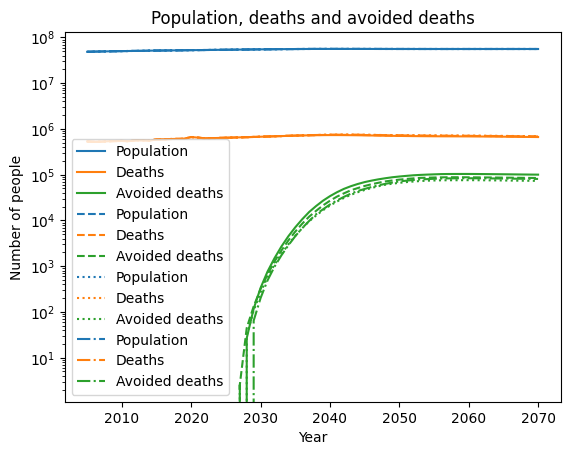

In [7]:
year=np.arange(2005,2071)
plt.plot(year, np.sum(population[0,:,:,1],axis=1), label='Population', color='tab:blue')
plt.plot(year, np.sum(deaths[0,:,:,1],axis=1), label='Deaths', color='tab:orange')
plt.plot(year, np.sum(avoided_deaths[0,:,:,1],axis=1), label='Avoided deaths', color='tab:green')
plt.plot(year, np.sum(population[0,:,:,2],axis=1), label='Population', color='tab:blue', linestyle='dashed')
plt.plot(year, np.sum(deaths[0,:,:,2],axis=1), label='Deaths', color='tab:orange', linestyle='dashed')
plt.plot(year, np.sum(avoided_deaths[0,:,:,2],axis=1), label='Avoided deaths', color='tab:green', linestyle='dashed')
plt.plot(year, np.sum(population[0,:,:,3],axis=1), label='Population', color='tab:blue', linestyle='dotted')
plt.plot(year, np.sum(deaths[0,:,:,3],axis=1), label='Deaths', color='tab:orange', linestyle='dotted')
plt.plot(year, np.sum(avoided_deaths[0,:,:,3],axis=1), label='Avoided deaths', color='tab:green', linestyle='dotted')
plt.plot(year, np.sum(population[0,:,:,4],axis=1), label='Population', color='tab:blue', linestyle='dashdot')
plt.plot(year, np.sum(deaths[0,:,:,4],axis=1), label='Deaths', color='tab:orange', linestyle='dashdot')
plt.plot(year, np.sum(avoided_deaths[0,:,:,4],axis=1), label='Avoided deaths', color='tab:green', linestyle='dashdot')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Population, deaths and avoided deaths')
plt.yscale('log')
plt.legend()
plt.show()


In [8]:
print(population[929,2050-2005,80-18,1])

682051.5588555927


In [9]:
f = open("data_python.csv", "w") # ouverture du fichier en écriture
f.write("age,year,scenario,simulation_id,adjusted_mr,population,deaths,avoided_deaths\n")

for i in range(1000):
    for y in range(66):
        for a in range(88):
            for b in range(5):
                if b==0:
                    f.write(str(a+18)+","+str(y+2005)+","+"actuel"+","+str(i+1)+","+str(adjusted_mr[i,y,a,b])+","+str(population[i,y,a,b])+","+str(deaths[i,y,a,b])+","+str(avoided_deaths[i,y,a,b])+"\n")
                else:
                    f.write(str(a+18)+","+str(y+2005)+","+"sc"+str(b)+","+str(i+1)+","+str(adjusted_mr[i,y,a,b])+","+str(population[i,y,a,b])+","+str(deaths[i,y,a,b])+","+str(avoided_deaths[i,y,a,b])+"\n")
                
f.close()